<a href="https://colab.research.google.com/github/PravalikaMuthoju/GENERATIVE-AI/blob/main/GEN_AI_8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1571 - loss: 1.7659 - val_accuracy: 0.1125 - val_loss: 1.7763
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1456 - loss: 1.7770 - val_accuracy: 0.1125 - val_loss: 1.7760
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1498 - loss: 1.7627 - val_accuracy: 0.1125 - val_loss: 1.7757
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1389 - loss: 1.7665 - val_accuracy: 0.1156 - val_loss: 1.7754
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1358 - loss: 1.7762 - val_accuracy: 0.1156 - val_loss: 1.7750
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1302 - loss: 1.7654 - val_accuracy: 0.1156 - val_loss: 1.7747
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1464 - loss: 1.7500 - val_accuracy: 0.1156 - val_loss: 1.7744
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1356 - loss: 1.7801 - val_accuracy: 0.1156 - val_l

Test Accuracy: 0.2094
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Confusion Matrix:
[[ 0  1  0  0  0  0]
 [ 0  6  0  4  0  0]
 [ 0 56  0 74  0  0]
 [ 4 67  0 61  0  0]
 [ 2 15  0 25  0  0]
 [ 0  1  0  4  0  0]]


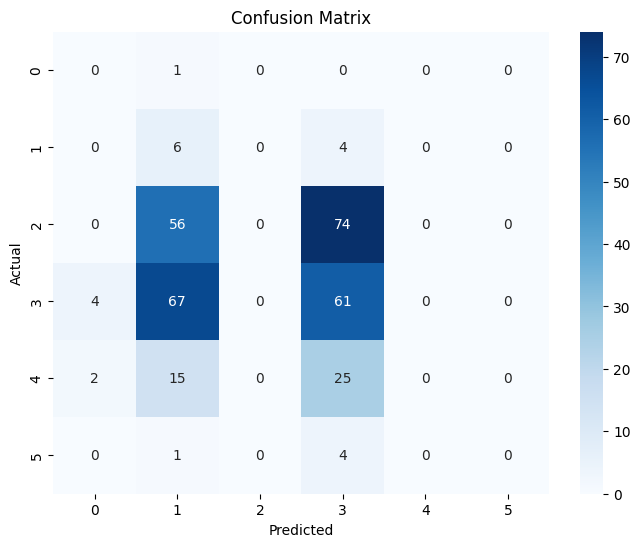

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.04      0.60      0.08        10
           2       0.00      0.00      0.00       130
           3       0.36      0.46      0.41       132
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00         5

    accuracy                           0.21       320
   macro avg       0.07      0.18      0.08       320
weighted avg       0.15      0.21      0.17       320

Model Loaded Successfully


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://drive.google.com/uc?export=download&id=1uutPAkOSYb2Uror1mk2dZUtoYbCgz6DO"
data = pd.read_csv(url)

# Splitting features and labels
X = data.drop(columns=['quality'])  # Assuming 'quality' is the target
y = data['quality']

# Convert target into categorical (assuming it's classification)
y = pd.get_dummies(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(20, activation='relu'),
    Dense(25, activation='relu'),
    Dense(10, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer
])

# Compile Model
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save Model
model.save('wine_quality_model.h5')

# Confusion Matrix & Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test.values, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Load Model for Deployment
def load_model():
    model = keras.models.load_model('wine_quality_model.h5')
    return model

deployed_model = load_model()
print("Model Loaded Successfully")
